# Track football players with YOLOv8 + ByteTrack

ByteTrack is a multi object tracker that identifies and identifies the trajectory of objects with accuracy.

In this notebook we will track football players on the field from YOLOv8 predictions. The videos of this project can be found in this kaggle [DFL - Bundesliga Data Shootout](https://www.kaggle.com/competitions/dfl-bundesliga-data-shootout/data) comptetition.

YOLOv8 was trained on [football-players-detection](https://universe.roboflow.com/roboflow-jvuqo/football-players-detection-3zvbc) dataset from Roboflow .The weights can be found [here](https://drive.google.com/drive/folders/1-1r2psRgW7JRSEykRmvUYEY31ufuxiDb?usp=share_link)


Setup

In [1]:
!pip install ultralytics --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.9/914.9 kB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 99.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 79.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 60.5 MB/s eta 0:00:00


In [2]:
!git clone https://github.com/ifzhang/ByteTrack.git
!cd ByteTrack && pip3 install -r requirements.txt
!cd ByteTrack && python3 setup.py develop
!pip install cython_bbox --quiet

Cloning into 'ByteTrack'...
remote: Enumerating objects: 2007, done.
remote: Total 2007 (delta 0), reused 0 (delta 0), pack-reused 2007 (from 1)
Receiving objects: 100% (2007/2007), 79.60 MiB | 36.87 MiB/s, done.
Resolving deltas: 100% (1141/1141), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.0/178.0 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 62.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
ERROR: Could not find a version that satisfies the requirement onnxruntime==1.8.0 (from versions: 1.15.0, 1.15.1, 1.16.0, 1.16.1, 1.16.2, 1.16.3, 1.17.0, 1.17.1, 1.17.3, 1.18.0, 1.18.1, 1.19.0, 1.19.2, 1.20.0, 1.20.1)
ERROR: No matching distribution found for onnxruntime==1.8.0
running develop
/usr/local/lib/python3.11/dist-packages/setuptools/command/develop.py:

In [3]:
!pip install onemetric --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.1 MB/s eta 0:00:00


In [4]:
import sys
sys.path.append("ByteTrack")

In [5]:
!pip install loguru

  Using cached loguru-0.7.3-py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.6/61.6 kB 2.6 MB/s eta 0:00:00


In [6]:
!pip install lap

  Using cached lap-0.5.12-cp311-cp311-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.2 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 19.6 MB/s eta 0:00:00


In [7]:
!pip install "numpy<1.24"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 50.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albucore 0.0.19 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompatible.
jaxlib 0.4.33 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
jax 0.4.33 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
scikit-image 0.25.1 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
imbalanced-learn 0.13.0 requires numpy<3,>=1.24.3, but you have numpy 1.23.5 which is incompatible.
blosc2 3.0.0 requires numpy>=1.25.0, but you have numpy 1.23.5 which is incompatible.
chex 0.1.88 requires numpy>=1.24.1, but you have numpy 1.23.5 

In [1]:
from yolox.tracker.byte_tracker import BYTETracker, STrack
from onemetric.cv.utils.iou import box_iou_batch
import matplotlib.pyplot as plt
from ultralytics import YOLO
from pathlib import Path
from tqdm import tqdm
import numpy as np
import cv2

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


## Load the video

In [2]:
def get_video_frames(video_path):

    video = cv2.VideoCapture(str(video_path))

    frames = []
    while video.isOpened():
        success, frame = video.read()
        if not success:
            break
        frames.append(frame)

    video.release()

    return frames

In [3]:
video_path = "input_video.mp4"

In [4]:
frames = get_video_frames(video_path)

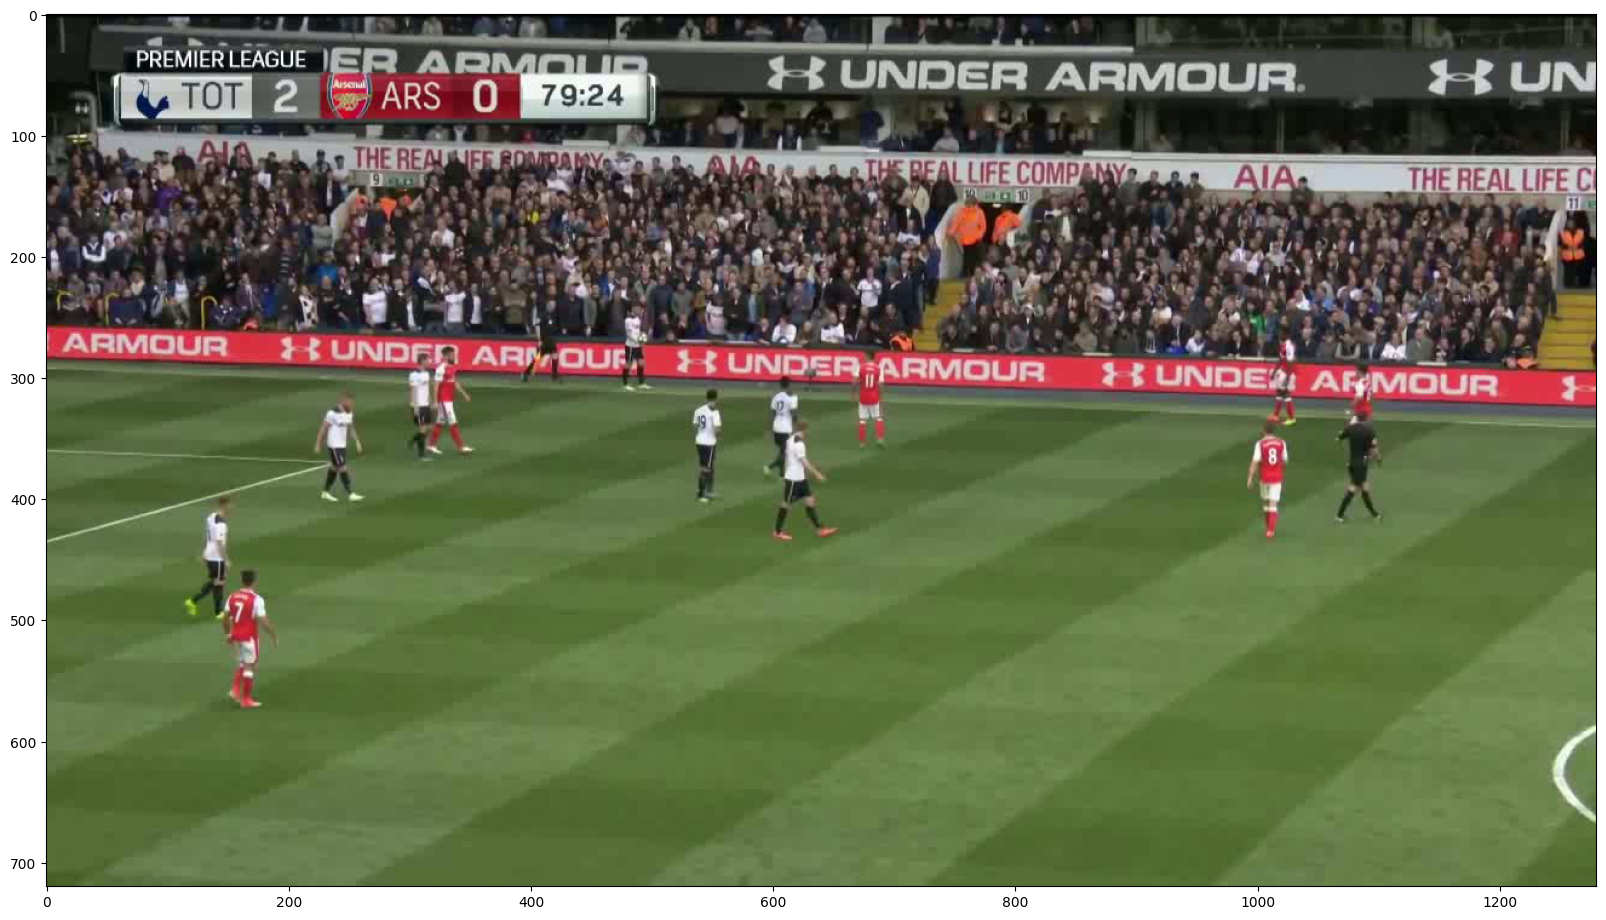

In [5]:
plt.figure(figsize=(20, 20))
plt.imshow(cv2.cvtColor(frames[0], cv2.COLOR_BGR2RGB))
plt.show()

## Load YOLOv8

In [6]:
path_weights = "yolov8m-640-football-players.pt"

In [7]:
yolo_model = YOLO(path_weights)

ind_to_cls = {
    0: "ball",
    1 : "goalkeeper",
    2 : "player",
    3 : "referee"
}

colors = {
    "ball": (0,200,200),
    "player": (255,0,0),
    "goalkeeper":(255,0,255),
    "referee": (0,0,255),
}

Display predictions on the first frame

In [8]:
prediction = yolo_model(frames[0])


0: 384x640 13 players, 1 referee, 65.0ms
Speed: 10.9ms preprocess, 65.0ms inference, 358.8ms postprocess per image at shape (1, 3, 384, 640)


In [9]:
def draw_detections(image, detections, draw_tacker_id: bool = False):
  image = image.copy()
  for pred in detections:
    bbox = pred.boxes.xyxy.int().tolist()[0]
    cls_ind = pred.boxes.cls.int().item()
    cls = ind_to_cls[cls_ind]
    cv2.rectangle(img=image, pt1=tuple(bbox[:2]), pt2=tuple(bbox[2:]), color=colors[cls], thickness=3)
    if draw_tacker_id:
      cv2.putText(image, str(pred.tracker_id), (bbox[0], bbox[1]-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, colors[cls], 3)
    else:
      cv2.putText(image, cls, (bbox[0], bbox[1]-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, colors[cls], 3)

  return image

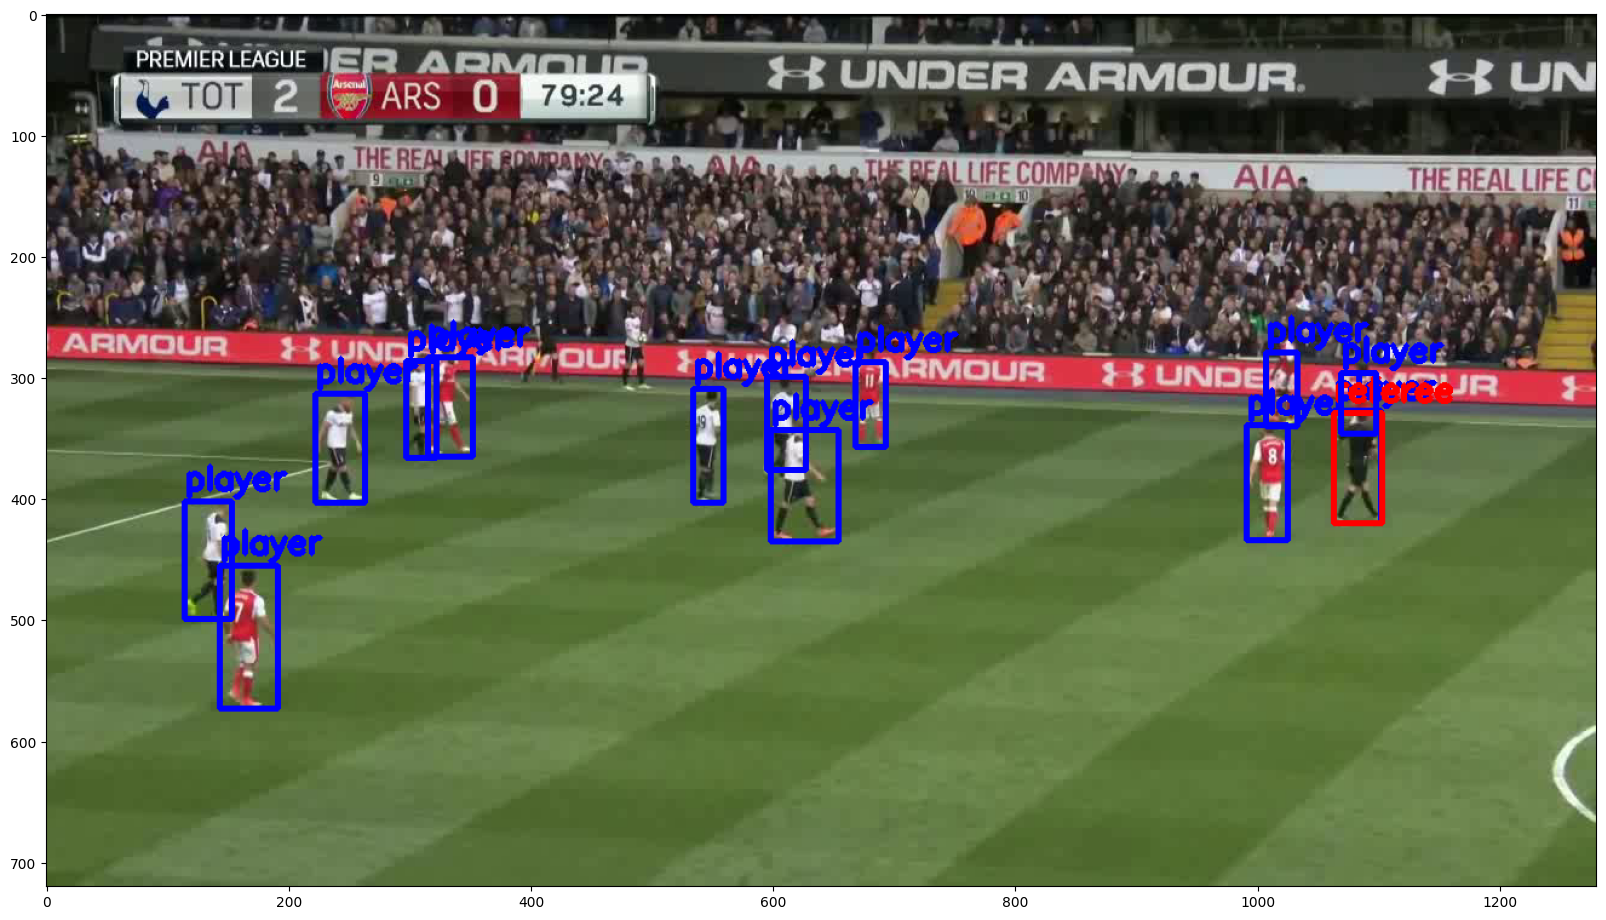

In [ ]:
image = draw_detections(frames[0], prediction[0])

plt.figure(figsize=(20, 20))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.grid(False)
plt.show()

## Create ByteTracker

ByteTrack creates trackers that are identified and attempts to find their trajectory across the frames.  
Also it expects the detection to have this format: (x1, y1, x2, y2, conf).

So we need to convert yolo detections to ByteTrack format and also identify they correspond to which tracker that is followed by ByteTrack.

In [10]:
from dataclasses import dataclass

@dataclass(frozen=True)
class BYTETrackerArgs:
  track_thresh: float = 0.25
  track_buffer: int = 30
  match_thresh: float = 0.8
  aspect_ratio_thresh: float = 3.0
  min_box_area: float = 1.0
  mot20: bool = False

In [11]:
# initiate tracker
byte_tracker = BYTETracker(BYTETrackerArgs)

In [12]:
def format_predictions(predictions, with_conf: bool = True):
  """
  Format yolo detection to ByteTracke format: (x1, y1, x2, y2, conf)
  """
  frame_detections = []
  for pred in predictions:
      bbox = pred.boxes.xyxy.int().tolist()[0]
      conf = pred.boxes.conf.item()
      if with_conf:
        detection = bbox + [conf]
      else:
        detection = bbox

      frame_detections.append(detection)
  return np.array(frame_detections, dtype=float)


In [13]:
def match_detections_with_tracks(detections, tracks):
  """
  Find which tracker corresponds to yolo detections and set the tracker_id.
  We compute the iou between the detection and trackers.
  """
  detections_bboxes = format_predictions(detections, with_conf=False)
  tracks_bboxes = np.array([track.tlbr for track in tracks], dtype=float)
  iou = box_iou_batch(tracks_bboxes, detections_bboxes)
  track2detection = np.argmax(iou, axis=1)

  for tracker_index, detection_index in enumerate(track2detection):
    if iou[tracker_index, detection_index] != 0:
      detections[detection_index].tracker_id = tracks[tracker_index].track_id
  return detections

In [14]:
def get_video_writer(output_video_path, fps, width, height):
    output_video_path.parent.mkdir(exist_ok=True, parents=True)
    fourcc = cv2.VideoWriter_fourcc(*"mp4v")  # Ensure correct codec
    return cv2.VideoWriter(
        str(output_video_path),
        fourcc,
        fps,
        (width, height)  # Ensure the size matches the input frames
    )



## Track players and save to video

In [15]:
output_video_path = Path("output_video.mp4")  # Convert to Path object

# Get frame width and height dynamically
frame_height, frame_width, _ = frames[0].shape
video_writer = get_video_writer(output_video_path, 30, frame_width, frame_height)

In [16]:
for frame in tqdm(frames):

    # detect players with yolo
    detections = yolo_model(frame, verbose=False)[0]

    # create a new list of detection with tracker_id attribute.
    detections_with_tracker = []
    for detection in detections:
      detection.tracker_id = ""
      detections_with_tracker.append(detection)

    # get trackers with ByteTrack
    tracks = byte_tracker.update(
        output_results=format_predictions(detections_with_tracker, with_conf=True),
        img_info=frame.shape,
        img_size=frame.shape
    )

    # set tracker_id in yolo detections
    detections_with_tracker = match_detections_with_tracks(detections_with_tracker, tracks)

    # annotate the frame
    image = draw_detections(frame, detections_with_tracker, True)

    # save the frame to video writer
    video_writer.write(image)

# save the video
video_writer.release()

100%|██████████| 701/701 [00:24<00:00, 28.93it/s]


In [17]:
!pip install motmetrics

  Using cached motmetrics-1.4.0-py3-none-any.whl.metadata (20 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.5/161.5 kB 3.4 MB/s eta 0:00:00



             ByteTrack
num_frames  701.000000
mota          0.839345
idf1          0.60159
precision     0.909453
recall        0.883885




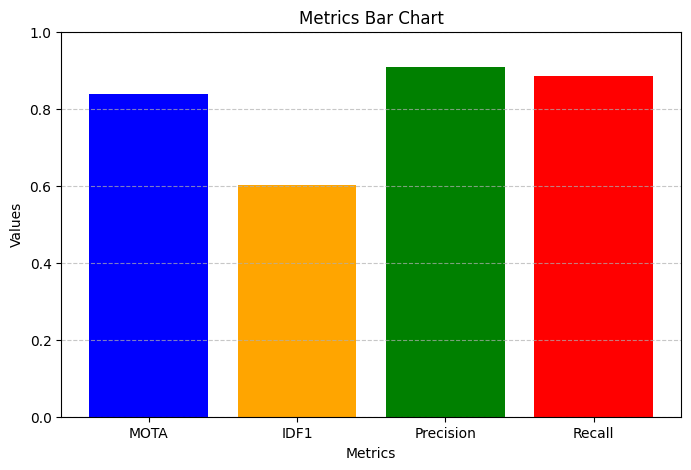

In [22]:
import motmetrics as mm
from pathlib import Path

# Ensure your ground truth file path is correct
ground_truth_path = Path("gt.txt")
predictions_path = Path("predictions.txt")

def save_predictions_to_file(predictions_by_frame, output_file):
    """
    Save the predictions in MOT format for evaluation.
    """
    with open(output_file, "w") as f:
        for frame_id, detections in enumerate(predictions_by_frame, start=1):
            for detection in detections:
                bbox = detection.boxes.xywh.tolist()[0]  # Convert to (x, y, w, h)
                track_id = getattr(detection, "tracker_id", -1)  # Use tracker_id or -1 if not present
                conf = detection.boxes.conf.item() if detection.boxes.conf is not None else -1  # Confidence score
                # Write in MOT format: frame, id, x, y, w, h, confidence, class, -1
                f.write(f"{frame_id},{track_id},{bbox[0]},{bbox[1]},{bbox[2]},{bbox[3]},{conf},-1,-1\n")


# Generate predictions for all frames and add tracker_id
predictions_by_frame = []
for frame in tqdm(frames):
    detections = yolo_model(frame, verbose=False)[0]
    detections_with_tracker = []
    for detection in detections:
        # Add the tracker_id attribute to the detection object
        detection.tracker_id = -1  # Default value
        detections_with_tracker.append(detection)

    tracks = byte_tracker.update(
        output_results=format_predictions(detections_with_tracker, with_conf=True),
        img_info=frame.shape,
        img_size=frame.shape
    )

    # Match detections with tracks to assign tracker_id
    predictions_with_tracker = match_detections_with_tracks(detections_with_tracker, tracks)
    predictions_by_frame.append(predictions_with_tracker)

# Save the predictions in MOT format
predictions_path = "predictions.txt"
save_predictions_to_file(predictions_by_frame, predictions_path)

def compute_metrics(gt_file, pred_file):
    """
    Calculate MOTA, IDF1, and Precision using motmetrics.
    """
    gt = mm.io.loadtxt(gt_file, fmt="mot15-2D")
    pred = mm.io.loadtxt(pred_file, fmt="mot15-2D")
    acc = mm.MOTAccumulator(auto_id=True)

    # Accumulate frame-by-frame metrics
    for frame_id in sorted(gt.keys()):
        gt_objects = gt.get(frame_id, [])
        pred_objects = pred.get(frame_id, [])
        gt_ids = [obj[0] for obj in gt_objects]  # Ground truth IDs
        pred_ids = [obj[0] for obj in pred_objects]  # Predicted IDs

        # Extract bounding boxes
        gt_bboxes = [obj[1:5] for obj in gt_objects]
        pred_bboxes = [obj[1:5] for obj in pred_objects]

        # Compute IOU for distance
        distances = mm.distances.iou_matrix(gt_bboxes, pred_bboxes, max_iou=0.5)
        acc.update(gt_ids, pred_ids, distances)

    # Compute metrics
    mh = mm.metrics.create()
    summary = mh.compute(
        acc,
        metrics=["mota", "idf1", "precision"],
        name="Summary"
    )
    print("Metrics:\n", summary)
    return summary

# Compute the metrics
ground_truth_path = "gt.txt"  # Replace with your actual ground truth file path
metrics = compute_metrics(ground_truth_path, predictions_path)


As it is clear these results are better than our first implementation of bytetrack.